# DNN 모델을 이용한 MNIST 데이터 셋 분류

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## 1-1. input tensor, target sensor 준비

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

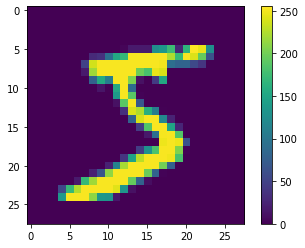

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[0]

5

## 1-2 입력데이터 전처리

In [ ]:
# (60000,28,28) ==> (60000, 28*28)
train_images = train_images.reshape((60000,28*28))

In [ ]:
print(train_images.shape)

(60000, 784)


In [ ]:
print(test_images.shape)

(10000, 28, 28)


In [ ]:
test_images = test_images.reshape((10000,28*28))

In [ ]:
print(test_images.shape)

(10000, 784)


##2 DNN 모델 디자인

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
model = models.Sequential()
#hidden layer에 256개 퍼셉트론 생성
model.add(layers.Dense(units = 256, activation = 'relu',
                       input_shape = (28*28,)))
model.add(layers.Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [ ]:
w_cnt = 28*28*256
b_cnt = 256
w_cnt +  b_cnt

200960

#3 모델의 학습정보 설정

In [ ]:
#loss, optimizer, metrics
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#4 모델에 input, target 데이터 연결 후 학습

In [ ]:
history = model.fit(x=train_images, y=train_labels, epochs=30, batch_size=128,
                    validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 4s 8ms/step - loss: 6.2242 - accuracy: 0.8790 - val_loss: 1.2138 - val_accuracy: 0.9272
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.8812 - accuracy: 0.9408 - val_loss: 0.8619 - val_accuracy: 0.9399
Epoch 3/30
375/375 [==============================] - 3s 8ms/step - loss: 0.5151 - accuracy: 0.9583 - val_loss: 0.7616 - val_accuracy: 0.9517
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3760 - accuracy: 0.9675 - val_loss: 0.8369 - val_accuracy: 0.9542
Epoch 5/30
375/375 [==============================] - 3s 8ms/step - loss: 0.3249 - accuracy: 0.9718 - val_loss: 0.7021 - val_accuracy: 0.9600
Epoch 6/30
375/375 [==============================] - 3s 8ms/step - loss: 0.2660 - accuracy: 0.9758 - val_loss: 0.6963 - val_accuracy: 0.9613
Epoch 7/30
375/375 [==============================] - 3s 8ms/step - loss: 0.2308 - accuracy: 0.9789 - val_loss: 0.8492 - val_accuracy: 0.9629
Epoch 

#학습 과정 시각화 및 테스트

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
acc

[0.8790416717529297,
 0.940791666507721,
 0.9583125114440918,
 0.9674583077430725,
 0.971833348274231,
 0.9758333563804626,
 0.9789166450500488,
 0.9809374809265137,
 0.9839583039283752,
 0.9843541383743286,
 0.9870625138282776,
 0.987375020980835,
 0.9883333444595337,
 0.9883333444595337,
 0.9905624985694885,
 0.9907708168029785,
 0.9913125038146973,
 0.992020845413208,
 0.99239581823349,
 0.9926041960716248,
 0.9935833215713501,
 0.9936249852180481,
 0.9937708377838135,
 0.9940000176429749,
 0.9941250085830688,
 0.9948958158493042,
 0.9956874847412109,
 0.9948333501815796,
 0.995187520980835,
 0.995520830154419]

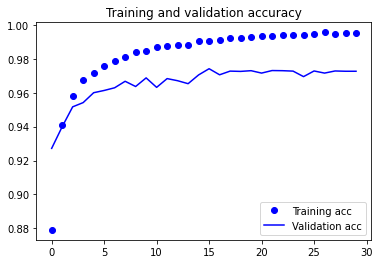

In [ ]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

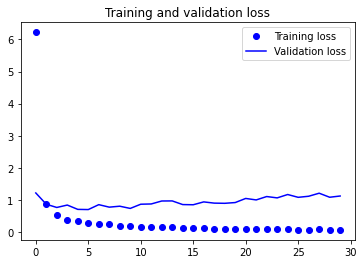

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#모델 성능 테스트
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.9919 - accuracy: 0.9763


In [ ]:
import numpy as np

In [ ]:
predict = model.predict(test_images[0].reshape((1,28*28)))

In [ ]:
predict

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
print(np.argmax(predict[0]))

7


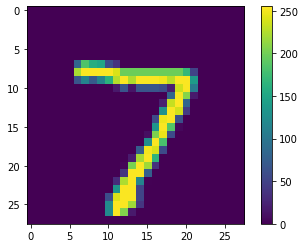

In [ ]:
plt.figure()
plt.imshow(test_images[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()